In [6]:
import numpy as np
import pandas as pd
import pyreadr
import scipy

In [7]:
perfomances_dt4 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt4.rds")[None] # also works for RData
# Get base level L and create L_pct reduction (% reduction with baselevel)
# baselevel_n = perfomances_dt5[(perfomances_dt5['NMS'] == '1') & (perfomances_dt5['policy'] == 'fee_0')]['L'].to_numpy()[0]
# perfomances_dt5['L_pct_red'] = (1-(perfomances_dt5['L']/baselevel_n))*100
# Get base level P and create P_dlt (change in P with baselevel)
baselevel_p = perfomances_dt4[(perfomances_dt4['NMS'] == 'static') & (perfomances_dt4['policy'] == 'fee_0')]['P'].to_numpy()[0]
perfomances_dt4['P_dlt'] = perfomances_dt4['P']-baselevel_p
# CalcGetulate base level Y_corn and create Y_corn_pct (% change with baselevel)
baselevel_y = perfomances_dt4[(perfomances_dt4['NMS'] == 'static') & (perfomances_dt4['policy'] == 'fee_0')]['Y_corn'].to_numpy()[0]
perfomances_dt4['Y_corn_pct'] = perfomances_dt4['Y_corn']/baselevel_y

# #Keep change in Y >= 95%
perfomances_dt4 = perfomances_dt4[perfomances_dt4['Y_corn_pct'] >= 0.95]
perfomances_dt4 = perfomances_dt4[perfomances_dt4['Y_corn_pct'] <= 1.05]

# #Calculate ag-sector cost
perfomances_dt4['C'] = - perfomances_dt4['P_dlt'] - perfomances_dt4['G']
# perfomances_dt4['L_change'] = -perfomances_dt4['L_change']
perfomances_dt4[perfomances_dt4['policy_name'] == 'ratio']


,policy,NMS,Y_corn,L,N_fert,P,G,L_change,policy_val,policy_name,net_balance,P_dlt,Y_corn_pct,C
0,ratio_5,dynamic1,12829.222153,36.743097,174.505316,1673.937380,0.000000,-3.8,5.0,ratio,-3.605975,-3.605975,0.994977,3.605975
1,ratio_7,dynamic1,12715.747639,33.608906,161.196490,1622.232110,45.135017,-12.0,7.0,ratio,-10.176229,-55.311246,0.986176,10.176229
2,ratio_9,dynamic1,12583.153309,31.467867,150.719224,1571.735241,84.402765,-17.6,9.0,ratio,-21.405349,-105.808115,0.975893,21.405349
3,ratio_11,dynamic1,12457.048174,29.997943,142.777656,1524.109155,119.933231,-21.5,11.0,ratio,-33.500970,-153.434201,0.966113,33.500970
4,ratio_13,dynamic1,12302.252518,28.784462,134.993713,1476.626795,151.192958,-24.7,13.0,ratio,-49.723602,-200.916561,0.954107,49.723602
18,ratio_5,dynamic2,12786.095909,35.029926,168.952570,1671.786628,0.000000,-8.3,5.0,ratio,-5.756727,-5.756727,0.991632,5.756727
19,ratio_7,dynamic2,12760.268164,34.829814,167.221483,1622.560489,46.822015,-8.8,7.0,ratio,-8.160851,-54.982866,0.989629,8.160851
20,ratio_9,dynamic2,12670.321974,32.474623,156.655144,1576.459596,87.726880,-15.0,9.0,ratio,-13.356880,-101.083760,0.982653,13.356880
21,ratio_11,dynamic2,12562.015266,30.851531,148.293994,1530.309387,124.566955,-19.3,11.0,ratio,-22.667014,-147.233969,0.974253,22.667014
22,ratio_13,dynamic2,12446.100357,30.160108,143.607223,1481.088904,160.840090,-21.1,13.0,ratio,-35.614362,-196.454452,0.965263,35.614362


In [13]:
perfomances_dt4['L_change'] = -perfomances_dt4['L_change']
# perfomances_dt4 = perfomances_dt4[perfomances_dt4['L_change'] >= 0]
perfomances_dt4 = perfomances_dt4.sort_values(by=['policy_val'])
ratio_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'ratio') & (perfomances_dt4['NMS'] == 'static')]
fee_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'fee') & (perfomances_dt4['NMS'] == 'static')]
nred_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'nred') & (perfomances_dt4['NMS'] == 'static')]
target_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'target') & (perfomances_dt4['NMS'] == 'static')]
#shadow_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'shadow') & (perfomances_dt4['NMS'] == 'static')]

ratio_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'ratio') & (perfomances_dt4['NMS'] == 'dynamic1')]
fee_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'fee') & (perfomances_dt4['NMS'] == 'dynamic1')]
nred_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'nred') & (perfomances_dt4['NMS'] == 'dynamic1')]
target_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'target') & (perfomances_dt4['NMS'] == 'dynamic1')]
# subs_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'subs') & (perfomances_dt4['NMS'] == 'dynamic1')]
#shadow_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'shadow') & (perfomances_dt4['NMS'] == 'dynamic1')]

perfomances_dt4[perfomances_dt4['policy_name'] == 'fee']
target_2_dt

,policy,NMS,Y_corn,L,N_fert,P,G,L_change,policy_val,policy_name,net_balance,P_dlt,Y_corn_pct,C
10,target_0.95,dynamic1,12442.682417,29.665803,141.391427,1643.001539,0.0,22.4,0.95,target,-34.541816,-34.541816,0.964998,34.541816
11,target_1,dynamic1,12666.943253,31.944504,154.837800,1664.985595,0.0,16.4,1.00,target,-12.557760,-12.557760,0.982391,12.557760


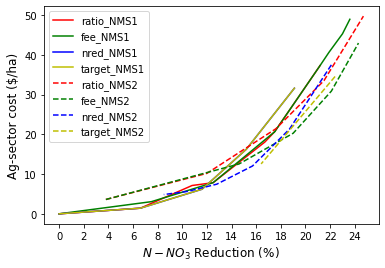

In [14]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig, ax = plt.subplots()
ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NMS1')
ax.plot(fee_1_dt['L_change'], fee_1_dt['C'], color = 'g', label = 'fee_NMS1')
ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'nred_NMS1')
ax.plot(target_1_dt['L_change'], target_1_dt['C'], color = 'y', label = 'target_NMS1')

ax.plot(ratio_2_dt['L_change'], ratio_2_dt['C'], linestyle='dashed', color = 'r',  label = 'ratio_NMS2')
ax.plot(fee_2_dt['L_change'], fee_2_dt['C'], linestyle='dashed', color = 'g', label = 'fee_NMS2')
ax.plot(nred_2_dt['L_change'], nred_2_dt['C'], linestyle='dashed', color = 'b', label = 'nred_NMS2')
ax.plot(target_2_dt['L_change'], target_2_dt['C'], linestyle='dashed', color = 'y', label = 'target_NMS2')

plt.legend()

plt.xlabel("$N-NO_3$ Reduction (%)", size = 12)
plt.ylabel("Ag-sector cost ($/ha)", size = 12)
ax.set_xticks((np.arange(0, 25, 2)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/ag_sector_cost.png"
plt.savefig(plot_file_name, dpi=300)